# Unstructured
- https://unstructured.io/
- https://unstructured-io.github.io/unstructured/index.html
- https://docs.unstructured.io/api-reference/api-services/python-sdk


## Setup

In [1]:
%%capture
%pip install "unstructured[all-docs]" unstructured-client watermark

In [2]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import JSON

import json

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import dict_to_elements, elements_to_json

In [4]:
%load_ext watermark

In [6]:
import unstructured

In [7]:
%watermark --iversions

unstructured_client: 0.22.0
unstructured       : 0.13.7
json               : 2.0.9



## Initial exploration ( extract elements)

In [7]:
import unstructured.partition

help(unstructured.partition)

Help on package unstructured.partition in unstructured:

NAME
    unstructured.partition

PACKAGE CONTENTS
    api
    auto
    common
    csv
    doc
    docx
    email
    epub
    html
    image
    json
    lang
    md
    model_init
    msg
    odt
    org
    pdf
    pdf_image (package)
    ppt
    pptx
    rst
    rtf
    strategies
    text
    text_type
    tsv
    utils (package)
    xlsx
    xml

FILE
    /Users/sudarshan/Documents/yt-code/youtube-stuffs/.venv/lib/python3.11/site-packages/unstructured/partition/__init__.py




In [8]:
from unstructured.partition.pdf import partition_pdf

# Specify the path to your PDF file
filename = "data/gpt4all.pdf"

# Call the partition_pdf function
# Returns a List[Element] present in the pages of the parsed pdf document
elements = partition_pdf(filename)

# Now, elements is a list of all elements present in the pages of the parsed pdf document

INFO: pikepdf C++ to Python logger bridge initialized


In [9]:
elements

In [10]:
len(elements)

134

In [13]:
element_dict = [el.to_dict() for el in elements]
output = json.dumps(element_dict, indent=2)
print(output)

[
  {
    "type": "UncategorizedText",
    "element_id": "b0c5cfcf93a217591e27d5c97845f59b",
    "text": "3 2 0 2",
    "metadata": {
      "coordinates": {
        "points": [
          [
            16.34,
            263.81000000000006
          ],
          [
            16.34,
            303.81000000000006
          ],
          [
            36.34,
            303.81000000000006
          ],
          [
            36.34,
            263.81000000000006
          ]
        ],
        "system": "PixelSpace",
        "layout_width": 595.276,
        "layout_height": 841.89
      },
      "file_directory": "data",
      "filename": "gpt4all.pdf",
      "languages": [
        "eng"
      ],
      "last_modified": "2024-05-03T13:31:00",
      "page_number": 1,
      "filetype": "application/pdf"
    }
  },
  {
    "type": "Title",
    "element_id": "d71e9973e25dde0d96dc422b5a8fd429",
    "text": "v o N 6",
    "metadata": {
      "coordinates": {
        "points": [
          [
      

In [12]:
unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'NarrativeText', 'Title', 'UncategorizedText'}


##### We don't see `Image`, image information is not extracted as we expected, lets use different strategy.

### Image extraction from PDF
- Now let’s say that your PDF has tables and let’s say you want to preserve the image data. 
- You will have to specify the [strategy](https://unstructured-io.github.io/unstructured/best_practices/strategies.html) parameter as `hi_res`. This will use a combination of computer vision and Optical Character Recognition (OCR) to extract the tables and maintain the structure. 

> Note: For even better image extraction Unstructured offers an API that improves upon the existing open source models.

> Depending upon machine, you might face different module / library issues, these links might help
- https://stackoverflow.com/questions/59690698/modulenotfounderror-no-module-named-lzma-when-building-python-using-pyenv-on
- https://unstructured-io.github.io/unstructured/installation/full_installation.html

In [15]:
from unstructured.partition.pdf import partition_pdf

elements = partition_pdf(filename=filename,
                     strategy='hi_res',
           )

INFO: Reading PDF for file: data/gpt4all.pdf ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...


In [16]:
element_dict = [el.to_dict() for el in elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'Image', 'Footer', 'Header', 'Table', 'UncategorizedText', 'ListItem', 'FigureCaption', 'NarrativeText', 'Title'}


In [21]:
images = [el for el in elements if el.category == "Image"]

print(images[5].text)
print(images[5].metadata.text_as_html)

Github Repo Growth — oPraall — UaMa — Alpaca 50000 40000 30000 Github Stars 20000 10000 i) 20 40 60 80 100 120 140 Days Since Launch
None


In [18]:
images

In [19]:
len(images)

6

## Another way ( extract / display images + elements )

In [19]:
partition_pdf??

Signature:
partition_pdf(
    filename: 'str' = '',
    file: 'Optional[Union[BinaryIO, SpooledTemporaryFile[bytes]]]' = None,
    include_page_breaks: 'bool' = False,
    strategy: 'str' = 'auto',
    infer_table_structure: 'bool' = False,
    ocr_languages: 'Optional[str]' = None,
    languages: 'Optional[List[str]]' = None,
    include_metadata: 'bool' = True,
    metadata_filename: 'Optional[str]' = None,
    metadata_last_modified: 'Optional[str]' = None,
    chunking_strategy: 'Optional[str]' = None,
    links: 'Sequence[Link]' = [],
    hi_res_model_name: 'Optional[str]' = None,
    extract_images_in_pdf: 'bool' = False,
    extract_image_block_types: 'Optional[List[str]]' = None,
    extract_image_block_output_dir: 'Optional[str]' = None,
    extract_image_block_to_payload: 'bool' = False,
    date_from_file_object: 'bool' = False,
    starting_page_number: 'int' = 1,
    **kwargs: 'Any',
) -> 'List[Element]'
Docstring:
Parses a pdf document into a list of interpreted elements.

In [22]:
# Get elements
path = "images"
raw_pdf_elements = partition_pdf(filename=filename,
                                 # Unstructured first finds embedded image blocks
                                 # Only applicable if `strategy=hi_res`
                                 extract_images_in_pdf=True,
                                 strategy = "hi_res",
                                 infer_table_structure=True,
                                 # Only applicable if `strategy=hi_res`
                                 extract_image_block_output_dir = path,
                                 )

INFO: Reading PDF for file: data/gpt4all.pdf ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Detecting page elements ...
INFO: Processing entire page OCR with tesseract...
INFO: Loading the Table agent ...
INFO: Loading the table structure model ...
INFO: Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
INFO: [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
INFO: Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.


Some weights of the model checkpoint at microsoft/table-transformer-structure-recognition were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: padding image by 20 for structure detection
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...
INFO: Processing entire page OCR with tesseract...


In [23]:
element_dict = [el.to_dict() for el in raw_pdf_elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'Image', 'Footer', 'Header', 'Table', 'UncategorizedText', 'ListItem', 'FigureCaption', 'NarrativeText', 'Title'}


In [24]:
images = [el for el in raw_pdf_elements if el.category == "Image"]

print(images[5].text)
print(images[5].metadata.text_as_html)

Github Repo Growth — oPraall — UaMa — Alpaca 50000 40000 30000 Github Stars 20000 10000 i) 20 40 60 80 100 120 140 Days Since Launch
None


### Let's display the images extracted

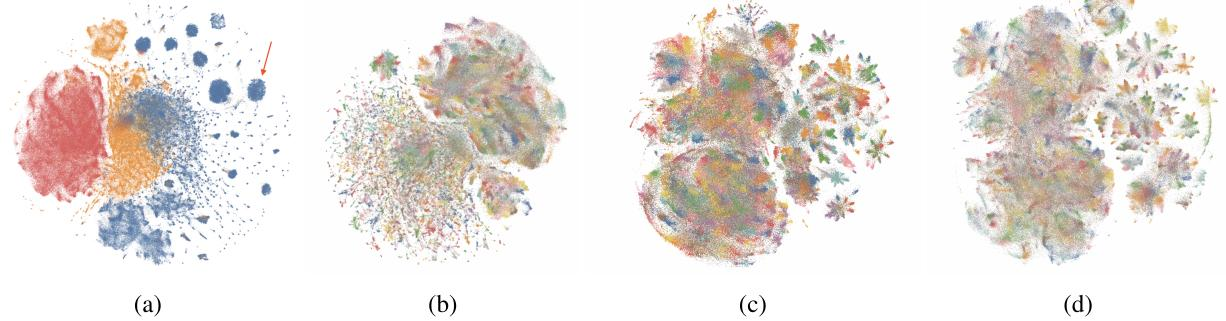

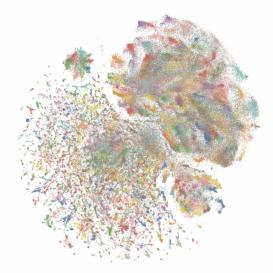

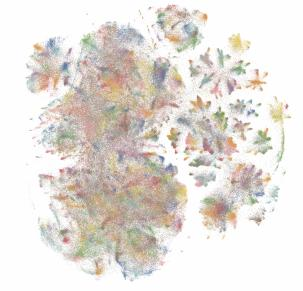

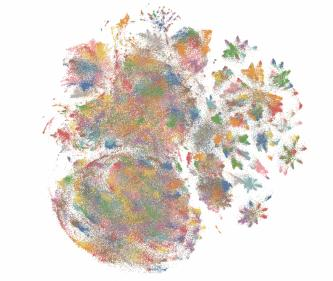

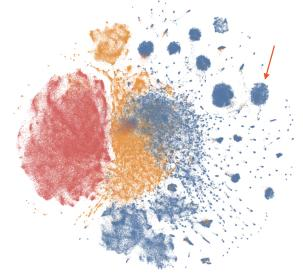

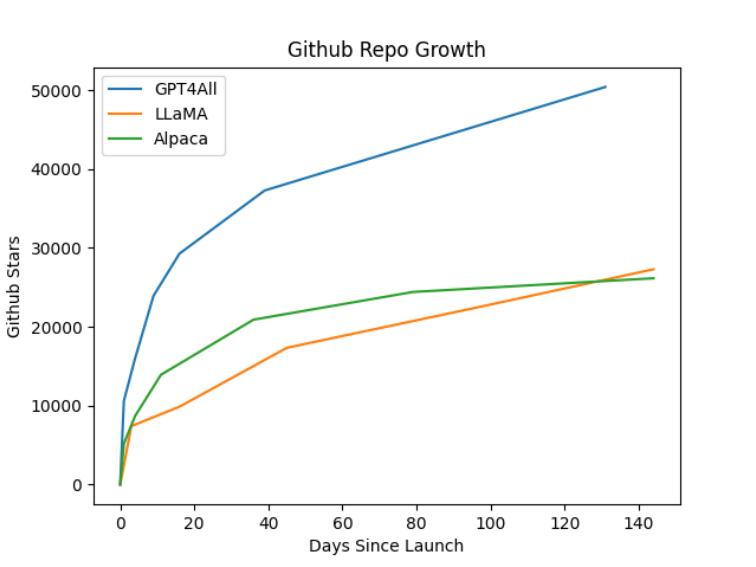

In [25]:
from IPython.display import Image, display
import glob

# Define the path to the folder containing the images
folder_path = "images/*.jpg"  # Update the file type as needed

# Use glob to search for JPG files in the specified folder
image_files = glob.glob(folder_path)

# Iterate through the list of image files and display each image inline
for image_file in image_files:
    display(Image(filename=image_file))

## Multi-modal (explain image using Llava)
#### Now, lets plugin in LangChain to explaiin the image using `Llava` via `Ollama`. More info in this [link](https://python.langchain.com/v0.1/docs/integrations/llms/ollama/)
#### [Ollama Playlist](https://www.youtube.com/playlist?list=PLz-qytj7eIWX-bpcRtvkixvo9fuejVr8y)

In [26]:
%%capture
%pip install langchain langchain_core langchain_community

In [27]:
from langchain_community.llms import Ollama

In [82]:
Ollama??

Init signature:
Ollama(
    *,
    name: Optional[str] = None,
    cache: ForwardRef('Union[BaseCache, bool, None]') = None,
    verbose: bool = None,
    callbacks: ForwardRef('Callbacks') = None,
    tags: Optional[List[str]] = None,
    metadata: Optional[Dict[str, Any]] = None,
    custom_get_token_ids: Optional[Callable[[str], List[int]]] = None,
    base_url: str = 'http://localhost:11434',
    model: str = 'llama2',
    mirostat: Optional[int] = None,
    mirostat_eta: Optional[float] = None,
    mirostat_tau: Optional[float] = None,
    num_ctx: Optional[int] = None,
    num_gpu: Optional[int] = None,
    num_thread: Optional[int] = None,
    num_predict: Optional[int] = None,
    repeat_last_n: Optional[int] = None,
    repeat_penalty: Optional[float] = None,
    temperature: Optional[float] = None,
    stop: Optional[List[str]] = None,
    tfs_z: Optional[float] = None,
    top_k: Optional[int] = None,
    top_p: Optional[float] = None,
    system: Optional[str] = None,
    t

In [28]:
llm = Ollama(model="llava:7b")

In [29]:
import PIL
print(PIL.__version__)

10.3.0



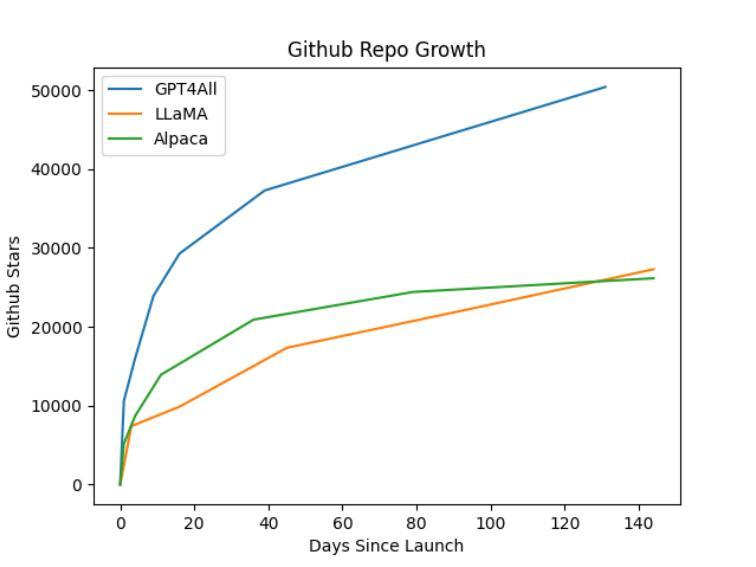

In [30]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./images/figure-4-6.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [31]:
llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("Explain the image")

' The image is a graph showing the growth of GitHub repositories over time. The graph includes three lines, each representing different types of repositories:\n\n1. Lama: This line represents a single repository called "Lama," which appears to be growing steadily over the given period, starting at 0 and increasing to just under 5,00 by the end of the timeframe shown on the graph.\n\n2. Alpaca: Similar to the Lama repository, this line also represents a single repository called "Alpaca." It also starts at 0 but grows more quickly than Lama, reaching approximately 75,00 by the end of the period.\n\n3. All repositories (average): This line represents an average growth rate across all repositories on GitHub. It shows a gradual increase in the number of repositories over time, with less variability than the other two lines.\n\nThe graph is marked with a timestamp ranging from the start to the end of the data, which is not explicitly labeled. The vertical axis represents the number of reposi